In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("weather_data.csv")
df.head()

,Temp,Humidity,Wind,Pressure,Cloud,Rain_%
0,28,53,4,1011,13,27
1,37,57,4,1013,53,31
2,22,70,3,1015,92,68
3,21,59,2,1017,79,49
4,34,64,20,1003,63,50


In [3]:
df.describe()

,Temp,Humidity,Wind,Pressure,Cloud,Rain_%
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.884000,65.259000,10.915000,1007.337000,50.804000,48.586000
std,6.624079,20.707987,5.539536,7.657681,28.522326,21.439829
min,18.000000,30.000000,2.000000,995.000000,0.000000,0.000000
25%,23.000000,48.000000,6.000000,1000.000000,27.000000,33.750000
50%,29.000000,65.000000,11.000000,1007.000000,52.000000,48.000000
75%,35.000000,84.000000,16.000000,1014.000000,75.000000,64.000000
max,40.000000,100.000000,20.000000,1020.000000,100.000000,100.000000


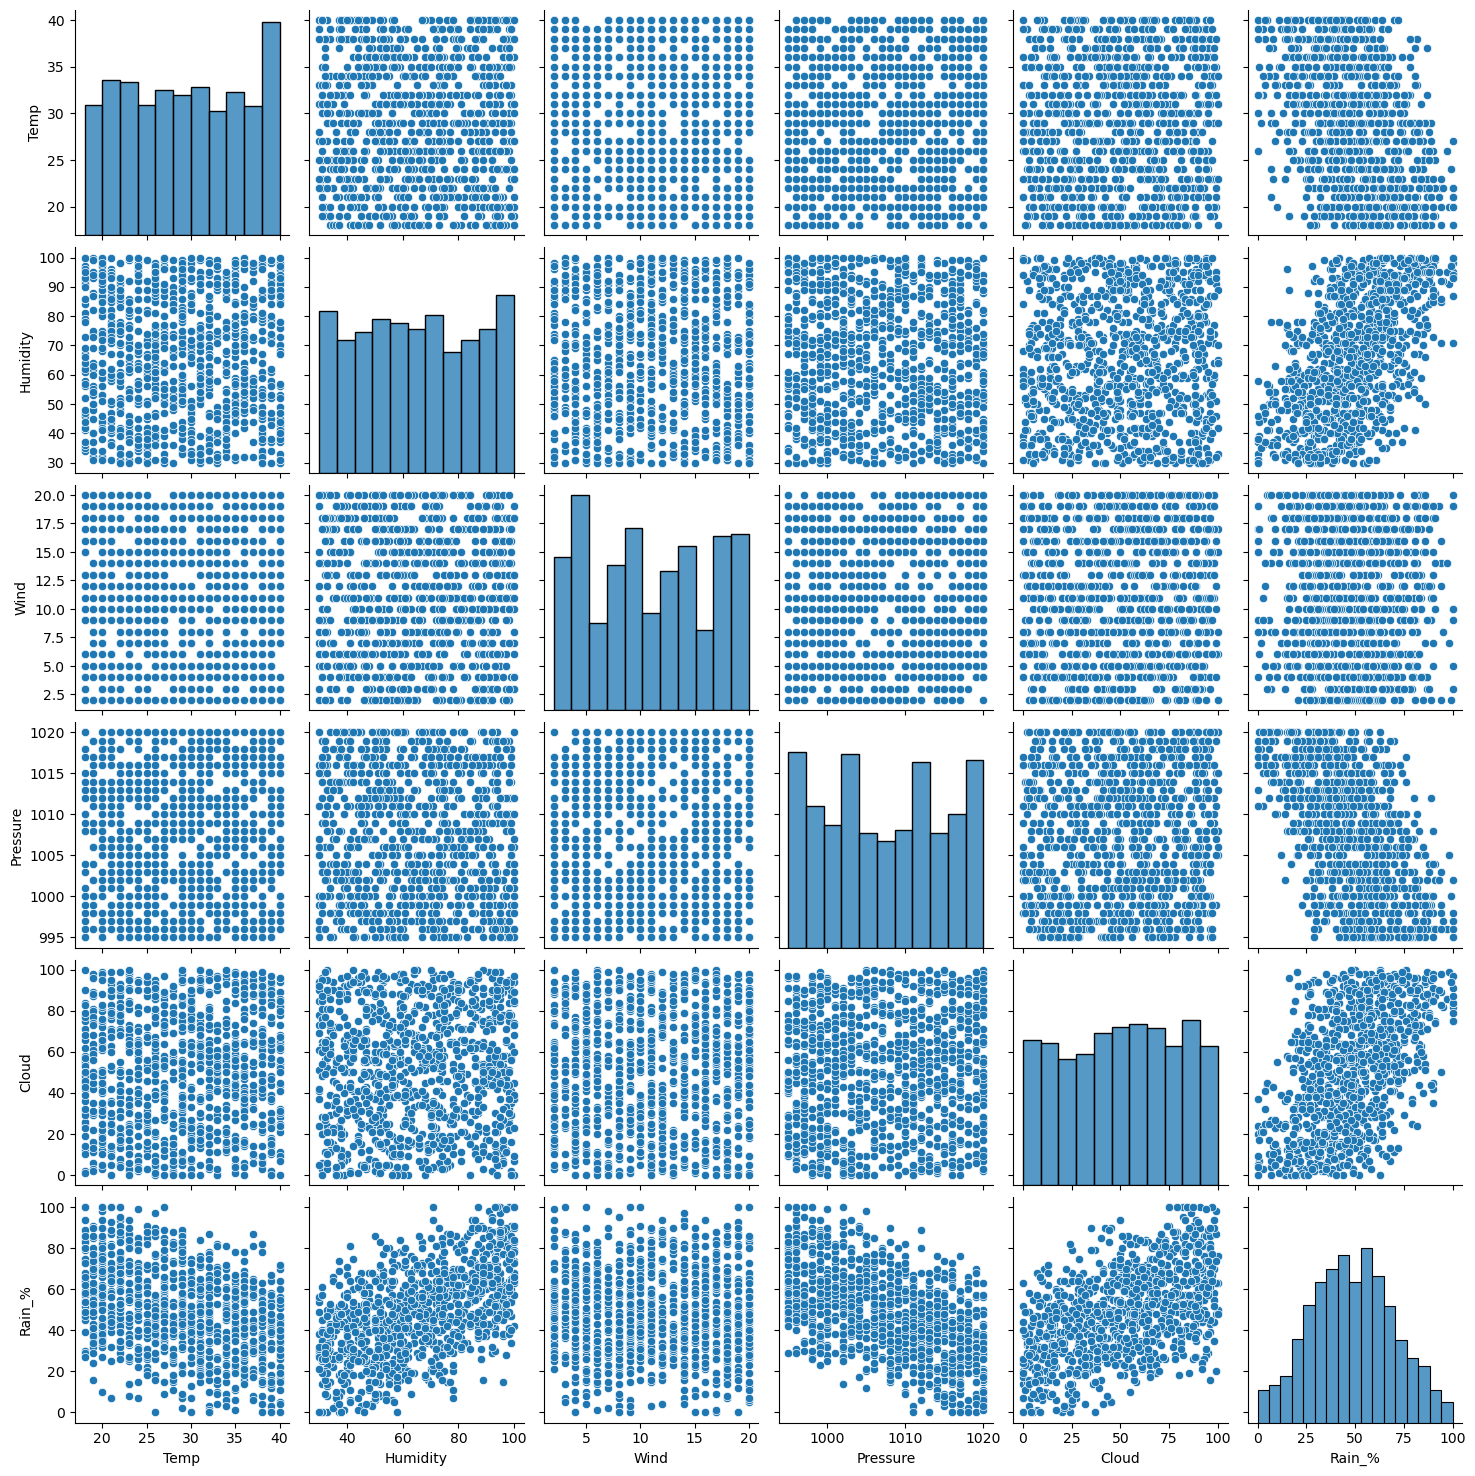

In [4]:
import seaborn as sns
sns.pairplot(df)

In [5]:
X=df[['Temp','Humidity','Wind','Pressure','Cloud']]
y=df['Rain_%']


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=45)


In [7]:
X_train.head()

,Temp,Humidity,Wind,Pressure,Cloud
640,35,32,17,1010,62
357,38,47,2,1000,3
596,25,30,6,1020,94
833,32,34,20,1012,81
896,33,32,16,1010,27


In [8]:
y_train.head()

640    26
357    25
596    31
833    40
896     9
Name: Rain_%, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [11]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
validation_score

array([-11.55181607,  -9.33381469,  -9.70473178,  -8.77562572,
        -9.71037597])

In [12]:
np.mean(validation_score)

np.float64(-9.815272847731046)

In [13]:
y_predict=regression.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

10.202116924978366
2.777984156290893
3.1940752848012783


In [15]:
from sklearn.metrics import r2_score 
r2_value=r2_score(y_test,y_predict)
r2_value

0.9769826296715052

In [18]:
new_data=[[29,85,16,1010.65,50]]
new_data_scaled=scaler.transform(new_data)
rain_chance=regression.predict(new_data_scaled)
print("Chance of rain is ",rain_chance)

Chance of rain is  [53.15462711]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
